In [2]:
# tutorial from keras blog https://blog.keras.io/building-autoencoders-in-keras.html

import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
input_img = Input(shape=(28, 28, 1))

# Apparently part of the reason convolutional autoencoders work better is 
# because of the higher "Entropic capacity" of the latent representation,
# in this case 128 dims vs lower dim no. in standard autoencoders

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = Model(input_img, decoded)

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [11]:
autoencoder.fit(x_train, x_train, epochs=50,
               batch_size=128, shuffle=True,
               validation_data=(x_test, x_test),
               callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 17s 280us/step - loss: 0.2453 - val_loss: 0.1900
Epoch 2/50
60000/60000 [==============================] - 13s 216us/step - loss: 0.1766 - val_loss: 0.1667
Epoch 3/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.1574 - val_loss: 0.1527
Epoch 4/50
60000/60000 [==============================] - 12s 198us/step - loss: 0.1461 - val_loss: 0.1439
Epoch 5/50
60000/60000 [==============================] - 12s 203us/step - loss: 0.1389 - val_loss: 0.1371
Epoch 6/50
60000/60000 [==============================] - 13s 210us/step - loss: 0.1340 - val_loss: 0.1304
Epoch 7/50
60000/60000 [==============================] - 13s 214us/step - loss: 0.1309 - val_loss: 0.1285
Epoch 8/50
60000/60000 [==============================] - 13s 211us/step - loss: 0.1281 - val_loss: 0.1239
Epoch 9/50
60000/60000 [==============================] - 12s 206us/step - loss: 0.1260 - val_

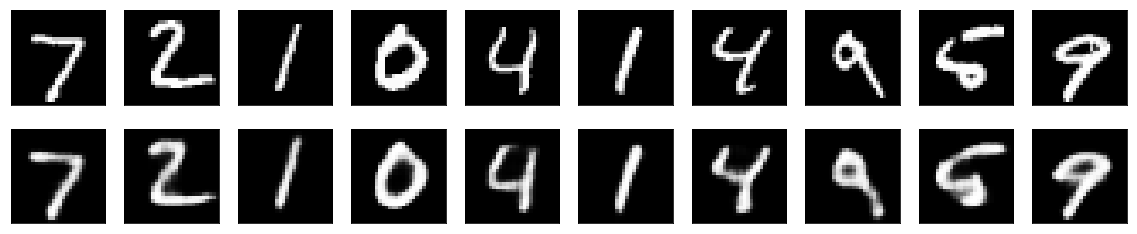

In [14]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)